In [1]:
import matplotlib.pyplot as plt

# Чтение данных из файла
with open('var_16_lognorm.csv', 'r') as f:
    data = [float(line.strip()) for line in f.readlines()]

Здесь будет попытка получить те же параметры для обрезанной выборки

In [2]:
# creating class for Data
class Statistics:
    def __init__(self, data: list, name: str):
        self.dataName = name
        self.dataArr = data
        self.dataLen = len(data)
        self.getAllParams()
        
    def dataSum(self):
        self.sum = sum(self.dataArr)
        return self.sum
    
    def dataMean(self):
        summ = self.dataSum()
        self.mean = summ / self.dataLen
        return self.mean
    
    def dataMedian(self):
        sortedData = sorted(self.dataArr)
        if self.dataLen % 2 == 0:
            # если количество элементов четное, берем среднее двух средних значений
            mid = self.dataLen // 2
            self.median = (sortedData[mid-1] + sortedData[mid]) / 2
        else:
            # если количество элементов нечетное, берем среднее значение
            self.median = sortedData[self.dataLen//2]
        return self.median
    
    def dataModa(self):
        # Создаем словарь, где ключи - элементы списка, а значения - количество их повторений
        countDict = {}
        for i in self.dataArr:
            if i in countDict:
                countDict[i] += 1
            else:
                countDict[i] = 1
        # Находим элемент(ы) с максимальным количеством повторений
        max_count = max(countDict.values())
        self.modes = []
        for key, value in countDict.items():
            if value == max_count:
                self.modes.append(key)

        # Возвращаем моду(ы)
        return self.modes
    
    def dataRange(self):
        self.range = max(self.dataArr) - min(self.dataArr)
        return self.range
    
    def dataBiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.biasedVariance = squared_differences_sum / (self.dataLen)
        return self.biasedVariance
    
    def dataUnbiasedVariance(self):
        mean = self.dataMean()
        squared_differences_sum = sum([(x - mean) ** 2 for x in self.dataArr])
        self.unbiasedVariance = squared_differences_sum / (self.dataLen - 1)
        return self.unbiasedVariance
    
    def dataStartMoment(self, k):
        moment = sum([x**k for x in self.dataArr])/self.dataLen
        return moment
    
    def dataCenterMoment(self, k):
        mean = self.dataMean()
        moment = sum([(x - mean) ** k for x in self.dataArr])/self.dataLen
        return moment
    
    def getAllParams(self):
        self.dataSum()
        self.dataMean()
        self.dataMedian()
        self.dataModa()
        self.dataRange()
        self.dataBiasedVariance()
        self.dataUnbiasedVariance()

    def printAllParams(self, printStats:bool = False, printGraphics:bool = False):
        self.getAllParams()
        print('='*100)
        print(f"Statistics for data: {self.dataName}")

        if printStats:
            print("Data mean is", self.mean)
            print("Data median is", self.median)
            print("Data moda is", self.modes)
            print("Data range is", self.range)
            print("Data Biased Variance is", self.biasedVariance)
            print("Data Unbiased Variance is", self.unbiasedVariance)
            print("Data start moment is", self.dataStartMoment(2))
            print("Data center moment is", self.dataCenterMoment(2))

        if printGraphics:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(self.dataArr, bins=range(int(min(self.dataArr)), int(max(self.dataArr)), 1), density=True)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
        print('='*100)
   
    def histogramm(self, columns:int=20, printMPL:bool = False):
        data_array = sorted(self.dataArr)
        data_min = min(data_array)
        data_max = max(data_array)
        data_range = data_max-data_min
        data_step = data_range/columns
        data_cpy = data_array.copy()
        data_columns = [[] for i in range(columns)]
        data_tmp = data_min
        for column_number in range(columns):
            elem_to_delete = []
            for i in range(len(data_cpy)):
                if data_cpy[i] >= data_tmp and data_cpy[i] < data_tmp + data_step:
                    data_columns[column_number].append(data_cpy[i])
                    elem_to_delete.append(data_cpy[i])
            for el in elem_to_delete:
                data_cpy.remove(el)
            data_tmp += data_step
        
        if(len(data_cpy) > 0):
            for i in range(len(data_cpy)):
                data_columns[-1].append(data_cpy[i])

        data_columns_probability = [len(i) for i in data_columns]
        
        max_prob = max(data_columns_probability)
        if max_prob == 0:
            return # нет значений, нечего выводить

        column_width = 10
        string_down = "\033[30m\033[47m{:>6}╚".format(0)
        string_down += '═' * column_width * (columns+1) + "► Значение случайной величины "
        str_len = len(string_down)

        str_tmp = "\033[30m\033[47m      " + " "*column_width * (columns//2) +"Гистограмма выборки" 
        print(str_tmp + " " *(str_len-len(str_tmp)))
        str_tmp = " Встретилось "
        print(str_tmp + " " *(str_len-len(str_tmp)-10))
        str_tmp = "раз в выборке"
        print(str_tmp + " " *(str_len-len(str_tmp)-10))
        print("      ▲" + " " * (str_len-17))
        print("      ║" + " " * (str_len-17))
        for y in range(max_prob):
            
            string = "\033[30m\033[47m{:>6}║".format(max_prob - y)
            string += ' ' * (column_width//2)
            for i in range(columns):
                if(data_columns_probability[i] >= max_prob - y):
                    string += '\033[36m\033[47m█' * column_width
                else:
                    string += '\033[36m\033[47m ' * column_width
            string += ' ' * 35
            print(string)
        # string_down = "\033[30m\033[47m{:>6}╚".format(0)
        # string_down += '═' * column_width * (columns+1) + "► Значение случайной величины "
                    
        print(string_down)
        X_axes_str = [data_min + data_step * i for i in range(columns+1)]
        string_down2 = "       "
        for i in X_axes_str:
            string_down2 += "{:^10.2f}".format(i) 
        string_down2 += " "*30
        print(string_down2)

        if printMPL:
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.hist(data_array, bins=columns)

            # Настройка внешнего вида графика
            ax.set_xlabel('Значение')
            ax.set_ylabel('Плотность вероятности')
            ax.set_title('Распределение')

            # Вывод графика на экран
            plt.show()
        

classedOldData = Statistics(data, 'Read data')
classedOldData.printAllParams(printStats= True)

Statistics for data: Read data
Data mean is 403173.42907651357
Data median is 9.5922675
Data moda is [8.98]
Data range is 67609309.661269
Data Biased Variance is 22862010778114.184
Data Unbiased Variance is 22938472352622.926
Data start moment is 23024559592027.523
Data center moment is 22862010778114.184


$$Выборочная \space(эмпири́ческая)\space фу́нкция\space распределе́ния\space в\space математической\space статистике\space —\\\space это\space приближение\space теоретической\space функции\space распределения,\space построенное \space с помощью\space выборки\space из\space него.$$
$$ Пусть\space X_{1},\ldots ,X_{n}\space — \spaceвыборка\space объёма\space n ,\space порождённая \spaceслучайной\space величиной \space X, \space задаваемой \space функцией \space распределения \space F(x) $$
$$ Будем\space считать, \space что \space X_{i},\space где\space i \in \{1, n\}, \space n\in \N \space— \spaceнезависимые\space случайные \spaceвеличины,\\
определенные \space на\space некотором\space пространстве \space элементарных \space исходов \space \Omega $$
$$ Пусть \space x \in \R. \space Определим \space функцию \space \hat{F}(x) \space следующим\space образом: $$ 
$$ \hat{F}(x) = \frac{1}{n}\sum_{i=1}^{n}\theta (x-X_{i}), \space где $$
$$ \theta (x)={\begin{cases}0,&x<0;\\1,&x\geqslant 0.\end{cases}}\space  —\space  Функция \space Хевисайда  $$


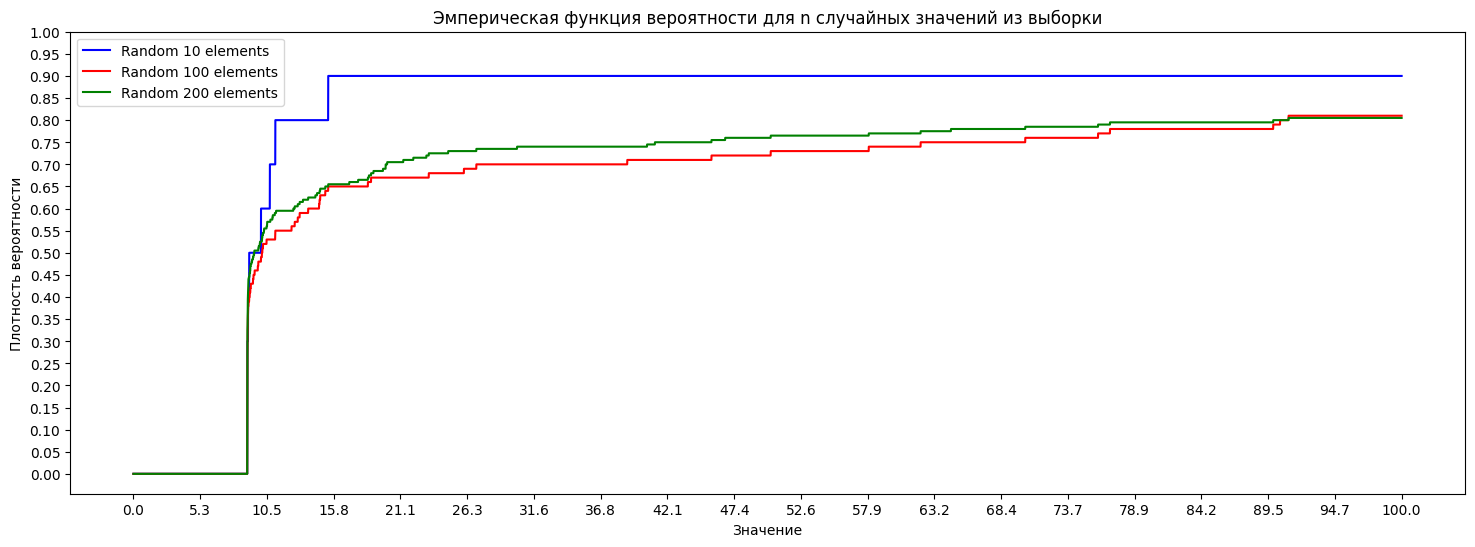

In [3]:
# плотность вероятности

import numpy as np
import random as rnd

def Heviside(x):
    if(x<0):
        return 0
    return 1

def f_hat(x, dataSet: Statistics):
    s = 0
    for xi in sorted(dataSet.dataArr):
        s += Heviside(x-xi)
    return s/dataSet.dataLen

def getRandomArr(dataSet: Statistics, len):
    result= rnd.sample(dataSet.dataArr, len)
    return result

dataRand_10 = getRandomArr(classedOldData, 10)
classedRandData_10 = Statistics(dataRand_10, 'Random 10 elements')
dataRand_100 = getRandomArr(classedOldData, 100)
classedRandData_100 = Statistics(dataRand_100, 'Random 100 elements')
dataRand_200 = getRandomArr(classedOldData, 200)
classedRandData_200 = Statistics(dataRand_200, 'Random 200 elements')

right_border = 100 # поставить 20к или 200к для дальнего вида
left_border = 0
X = np.linspace(0.001 + left_border,right_border, num=10000)
# step = 100
# X = [a/step for a in range(0, 100*step)]
Y_10 = [f_hat(a, classedRandData_10) for a in X]
Y_100 = [f_hat(a, classedRandData_100) for a in X]
Y_200 = [f_hat(a, classedRandData_200) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
ax.plot(X, Y_10, color='blue', label=f'{classedRandData_10.dataName}')
ax.plot(X, Y_100, color='red', label=f'{classedRandData_100.dataName}')
ax.plot(X, Y_200, color='green', label=f'{classedRandData_200.dataName}')

xt = np.linspace(left_border, right_border, num=20)
yt = [a/100 for a in range(0, 101, 5)]
ax.set_xticks(xt)
ax.set_yticks(yt)
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title('Эмперическая функция вероятности для n случайных значений из выборки')
ax.legend()

# Вывод графика на экран
plt.show()

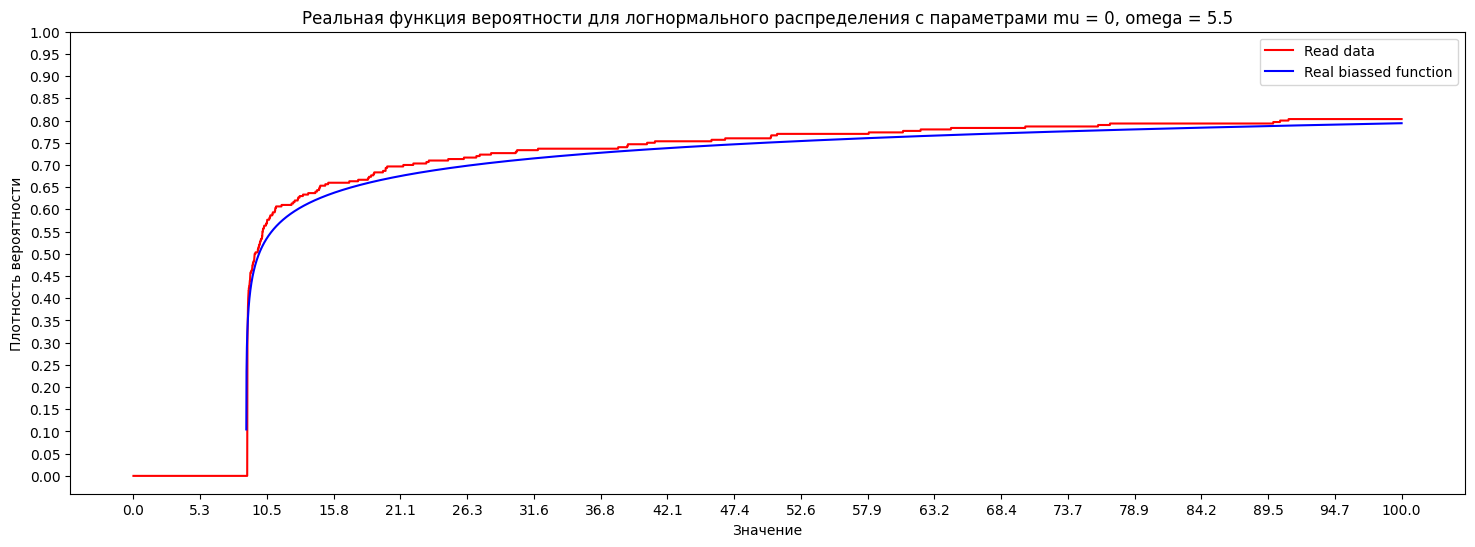

In [4]:
# теоретическая функция вероятности
import scipy as scp

def F_real(x, mu, sco, bias = 0):
    res = 1/2 + (scp.special.erf((np.log(x-bias)-mu)/(sco*(2**0.5))))/2
    return res

mu = 0
sco = 5.5
Y_real = [F_real(x, mu, sco) for x in X]

bias = 8.9
X_biased = np.linspace(0.001+bias+left_border,right_border, num=10000)
Y_real_biased = [F_real(x, mu, sco, bias) for x in X_biased]

Y_read = [f_hat(a, classedOldData) for a in X]

fig, ax = plt.subplots(figsize=(18, 6))
# ax.plot(X, Y_real, color='green', label=f'Real function')
ax.plot(X, Y_read, color='red', label=f'{classedOldData.dataName}')
ax.plot(X_biased, Y_real_biased, color='blue', label=f'Real biassed function')
# Настройка внешнего вида графика
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность вероятности')
ax.set_title(f'Реальная функция вероятности для логнормального распределения с параметрами mu = {mu}, omega = {sco}')
ax.set_xticks(xt)
ax.set_yticks(yt)
ax.legend()

# Вывод графика на экран
plt.show()

$$ Задача\space №3$$
$$ Пусть\space X_{1},\ldots ,X_{n}\space — \spaceвыборка\space объёма\space n ,\space порождённая \spaceслучайной\space величиной \space X, \space задаваемой\space равномерной \space функцией \space распределения \space на\space отрезке \space [ 0; \theta ] $$ 
$$ Сравнить \space оценки \space  2 \overline{X}, \space X_{(n)}, \space \frac{n+1}{n}X_{n} \space параметра \space \theta \space в \space среднеквадратичном\space смысле$$
$$ Решение $$
$$ Замечание: \space D[X]=E[(X-E(X))^2] = E[X^2] - E[X]^2 $$
$$ 1) \space E[(2\overline{X}-\theta)^2] = D(2\overline{X}-\theta) + E(2\overline{X}-\theta)^2 = \frac{\theta^2}{3n}$$
$$ D(2\overline{X}-\theta) = D(2\overline{X}) = 4D(\overline{X}) = \frac{4D(X_{1})}{n} = \frac{\theta^2}{3n}$$
$$ E(2\overline{X}-\theta) = E(2\overline{X})-E(\theta) = \theta-\theta = 0  $$
$$ 2)\space F_{X_{(n)}}(t) = P(X_{(n)}<t)=(P(X_{1}<t))^n = F_{X_{1}}^{n}(t) $$
$$  F_{X_{1}}(t) = \begin{Bmatrix}
0& t<0\\
\frac{t}{\theta}& t\in[0;\theta]\\
1& t>\theta
\end{Bmatrix}; \space \space f_{X_{1}}(t) = \begin{Bmatrix}
\frac{1}{\theta}& t\in[0;\theta]\\
0& иначе
\end{Bmatrix};\space f_{X_{n}}(t) = nF_{X_{1}}^{n-1}(t) f_{X_{1}}(t) = \begin{Bmatrix}
n\frac{t^{n-1}}{\theta^{n-1}}\frac{1}{\theta}& t\in[0;\theta]\\
0& иначе
\end{Bmatrix} $$
$$ E[(X_{(n)}-\theta)^2] = D(X_{(n)}-\theta) + E(X_{(n)}-\theta)^2 = \theta^2 (\frac{n}{(n+1)^2(n+2)}+\frac{1}{(n+1)^2}) = \theta^2 \frac{2}{(n+1)(n+2)}$$
$$ D(X_{(n)}-\theta) = D(X_{(n)}) = E(X_{(n)}^2) - (E(X_{(n)})^2) =\theta^2(\frac{n^3+2n^2+n}{(n+1)^2(n+2)}-\frac{n^3+2n^2}{(n+1)^2(n+2)}) = \theta^2 \frac{n}{(n+1)^2(n+2)}$$
$$ E(X_{(n)}) = \int_{-\infty}^{\infty} tf_{X_{n}}(t)dt= \frac{n}{\theta^n}\int_{0}^{\theta} t^n dt=\theta \frac{n}{n+1} $$
$$ E(X_{(n)})^2 = \int_{-\infty}^{\infty} t^2f_{X_{n}}(t)dt= \frac{n}{\theta^n}\int_{0}^{\theta} t^{n+1} dt=\theta^2 \frac{n}{n+2} $$
$$ E(X_{(n)}-\theta) = E(X_{(n)})-E(\theta) = \theta \frac{-1}{n+1}$$
$$ 3)\space E[(\frac{n+1}{n}X_{(n)}-\theta)^2] = D(\frac{n+1}{n}X_{(n)}-\theta) + E(\frac{n+1}{n}X_{(n)}-\theta)^2 =\theta^2 \frac{1}{n(n+2)}$$
$$ D(\frac{n+1}{n}X_{(n)}-\theta) = D(\frac{n+1}{n}X_{(n)}) = \frac{(n+1)^2}{n^2}D(X_{(n)})=\theta^2 \frac{1}{n(n+2)}$$
$$ E(\frac{n+1}{n}X_{(n)}-\theta) = \frac{n+1}{n}E(X_{(n)})-E(\theta) = \frac{n+1}{n} \theta \frac{n}{n+1} - \theta = 0$$
$$ 4) \space Сравнение $$
$$ E[(2\overline{X}-\theta)^2] = \frac{\theta^2}{3n}$$
$$ E[(X_{(n)}-\theta)^2] = \frac{2\theta^2 }{(n+1)(n+2)}$$
$$ E[(\frac{n+1}{n}X_{(n)}-\theta)^2] =  \frac{\theta^2}{n(n+2)}$$

$$ 1-2: \space  \frac{\theta^2}{3n} - \frac{2\theta^2 }{(n+1)(n+2)} = \theta^2 \frac{n^2-3n+2}{3n(n+1)(n+2)} = \\ = \theta^2 \frac{(n-2)(n-1)}{3n(n+1)(n+2)} = \begin{Bmatrix}
>0& n>2\\
=0& n\leqslant2
\end{Bmatrix}$$
$$ Одинаковы \space при \space n\leqslant2, \space X_{(n)} \space лучше \space 2\overline{X} \space при \space n>2  $$

$$ 2-3: \space   \frac{2\theta^2 }{(n+1)(n+2)} - \frac{\theta^2}{n(n+2)} = \theta^2 \frac{n-1}{n(n+1)(n+2)} = \begin{Bmatrix}
>0& n>1\\
=0& n=1
\end{Bmatrix}$$
$$ Одинаковы \space при \space n=1, \space \frac{n+1}{n}X_{(n)} \space лучше\space X_{(n)}\space при \space n>1  $$

In [6]:
  
# somedata = [rnd.randint(0, 100) for i in range (100)]
# classedReallyRandomData = Statistics(somedata, name="Really random data")
# classedReallyRandomData.histogramm(columns=10)

classedRandData_10.histogramm(columns=10);
classedRandData_100.histogramm(columns=10);
classedRandData_200.histogramm(columns=10);


                                                        Гистограмма выборки                                                                        
 Встретилось                                                                                                                                       
раз в выборке                                                                                                                                      
      ▲                                                                                                                                            
      ║                                                                                                                                            
     9║     ██████████                                                                                                                             
     8║     ██████████                                                                                          